In [1]:
# Notebook that analyzes the dataset itself
from midi2seq import process_midi_seq, segment, piano2seq
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
import glob
import tqdm
root = "./"

# Method that returns the first note for all the midi files in the dataset
def first_note(datadir='data'):
    all_midis = glob.glob(datadir+'/maestro-v1.0.0/**/*.midi')
    print(f"Number of midi files to process -- {len(all_midis)}")
    #tlist1 = tqdm.tqdm(all_midis, total = len(all_midis))
    data = []
    n_seq = 1 # Capture first two notes
    
    for ff in tqdm.tqdm(all_midis, total = len(all_midis)):
        # Define work variables
        first_note = None
        seq = piano2seq(ff)
        first_note = seq[1]
        # print(f"First note in this midi -- {first_note}")
        data.append(first_note)

    return np.array(data)
    

first_notes_in_midi = first_note(datadir=root)
print(first_notes_in_midi)

DEBUG:matplotlib data path: c:\Users\akamal4\AppData\Local\anaconda3\envs\csc_7343\Lib\site-packages\matplotlib\mpl-data
DEBUG:CONFIGDIR=C:\Users\akamal4\.matplotlib
DEBUG:interactive is False
DEBUG:platform is win32
DEBUG:CACHEDIR=C:\Users\akamal4\.matplotlib
DEBUG:Using fontManager instance from C:\Users\akamal4\.matplotlib\fontlist-v330.json


Number of midi files to process -- 2368


100%|██████████| 2368/2368 [08:12<00:00,  4.81it/s]

[265 259 258 ... 256 256 256]


DEBUG:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:findfont: score(FontEntry(fname='c:\\Users\\akamal4\\AppData\\Local\\anaconda3\\envs\\csc_7343\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:findfont: score(FontEntry(fname='c:\\Users\\akamal4\\AppData\\Local\\anaconda3\\envs\\csc_7343\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:findfont: score(FontEntry(fname='c:\\Users\\akamal4\\AppData\\Local\\anaconda3\\envs\\csc_7343\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNon

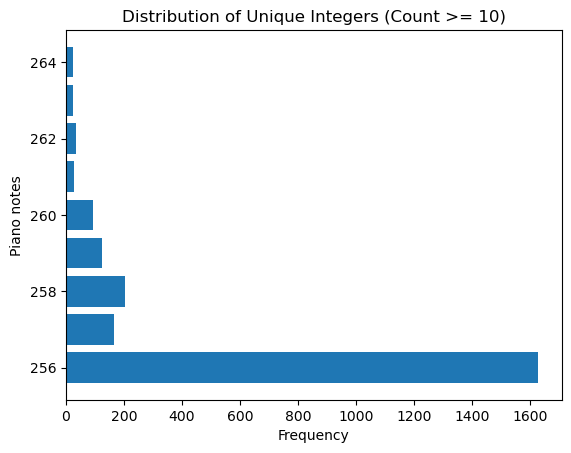

In [2]:
# Find unique notes and see their distribution
# Count the frequency of each unique integer
unique_integers, counts = np.unique(first_notes_in_midi, return_counts=True)

threshold = 10 # Adjust this threshold as needed

# Filter unique_integers and counts based on the threshold
filtered_integers = [x for x, count in zip(unique_integers, counts) if count >= threshold]
filtered_counts = [count for count in counts if count >= threshold]

# Create the horizontal bar plot
plt.barh(filtered_integers, filtered_counts)
plt.xlabel('Frequency')
plt.ylabel('Piano notes')
plt.title('Distribution of Unique Integers (Count >= {})'.format(threshold))
plt.show()

In [3]:
velo_inc = 5
num_samples = 130000
dat = process_midi_seq(datadir=root,n = num_samples) # numpy 2d array
print(dat.shape)
notes = np.unique(dat)

(131525, 51)


In [4]:
# dim code from midi2seq
dim = 128*2 + 100 + int(ceil(126/velo_inc))
print(f"dim has {dim} notes in vocabulary")
unique_notes = [x for x in range(dim)]
# print(unique_notes)

dim has 382 notes in vocabulary
